In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/content/dermatology_database_1.csv')
except FileNotFoundError:
    print("Error: 'dermatology_database_1.csv' not found. Please upload your data file.")
    exit()

# Q1: Split the data and train SVM, RF

In [ ]:
# Convert '?' to pd.NA
data = data.replace('?', pd.NA)
# Convert the DataFrame to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')
# Fill NaN with the mean of each column
data = data.fillna(data.mean())

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy (Original Data): {svm_accuracy}")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy (Original Data): {rf_accuracy}")



SVM Accuracy (Original Data): 0.7297297297297297
Random Forest Accuracy (Original Data): 1.0


# Q2: Find and remove outliers, then retrain

In [ ]:
# Simple IQR method for outlier detection
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

data_no_outliers = data.copy()
for col in X.columns:
  data_no_outliers = remove_outliers_iqr(data_no_outliers, col)

X_no_outliers = data_no_outliers.iloc[:, :-1]
y_no_outliers = data_no_outliers.iloc[:, -1]
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)


# Retrain SVM and RF
svm_model.fit(X_train_no, y_train_no)
svm_pred_no = svm_model.predict(X_test_no)
svm_accuracy_no = accuracy_score(y_test_no, svm_pred_no)
print(f"SVM Accuracy (No Outliers): {svm_accuracy_no}")

rf_model.fit(X_train_no, y_train_no)
rf_pred_no = rf_model.predict(X_test_no)
rf_accuracy_no = accuracy_score(y_test_no, rf_pred_no)
print(f"Random Forest Accuracy (No Outliers): {rf_accuracy_no}")



SVM Accuracy (No Outliers): 0.75
Random Forest Accuracy (No Outliers): 0.875


# Q3: Plot histograms for each column

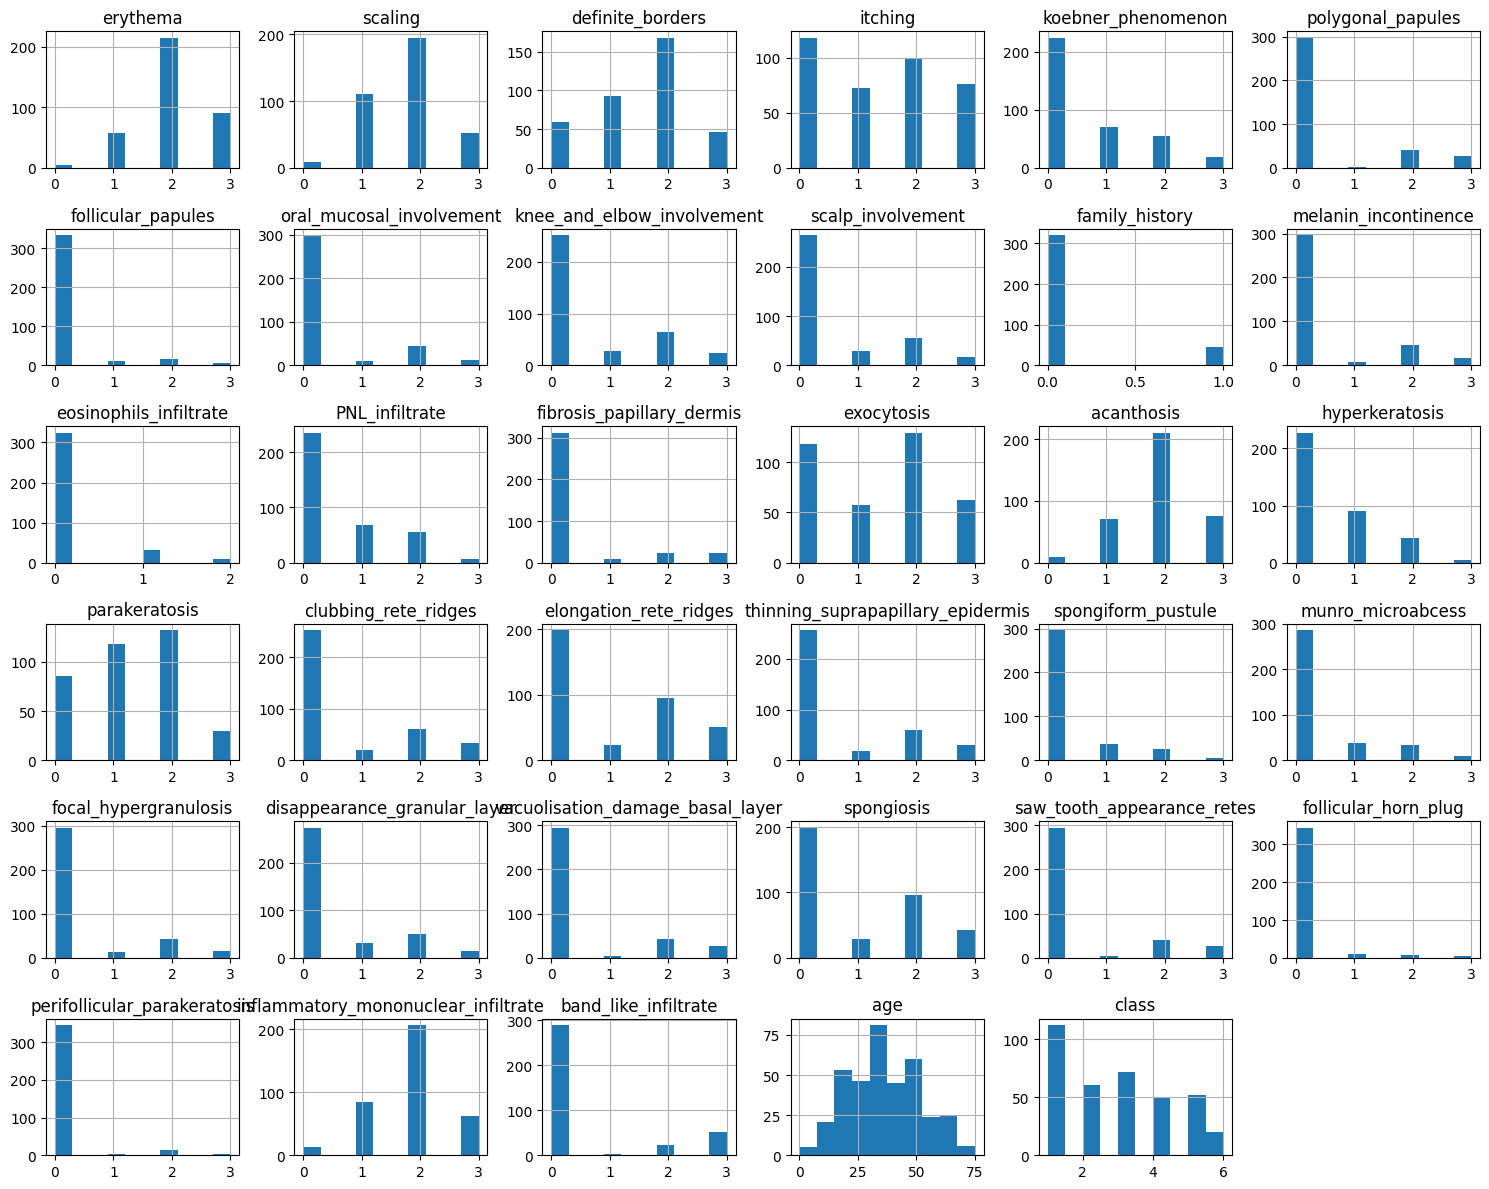

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame
data.hist(figsize=(15, 12))

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Rotate x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

plt.show()

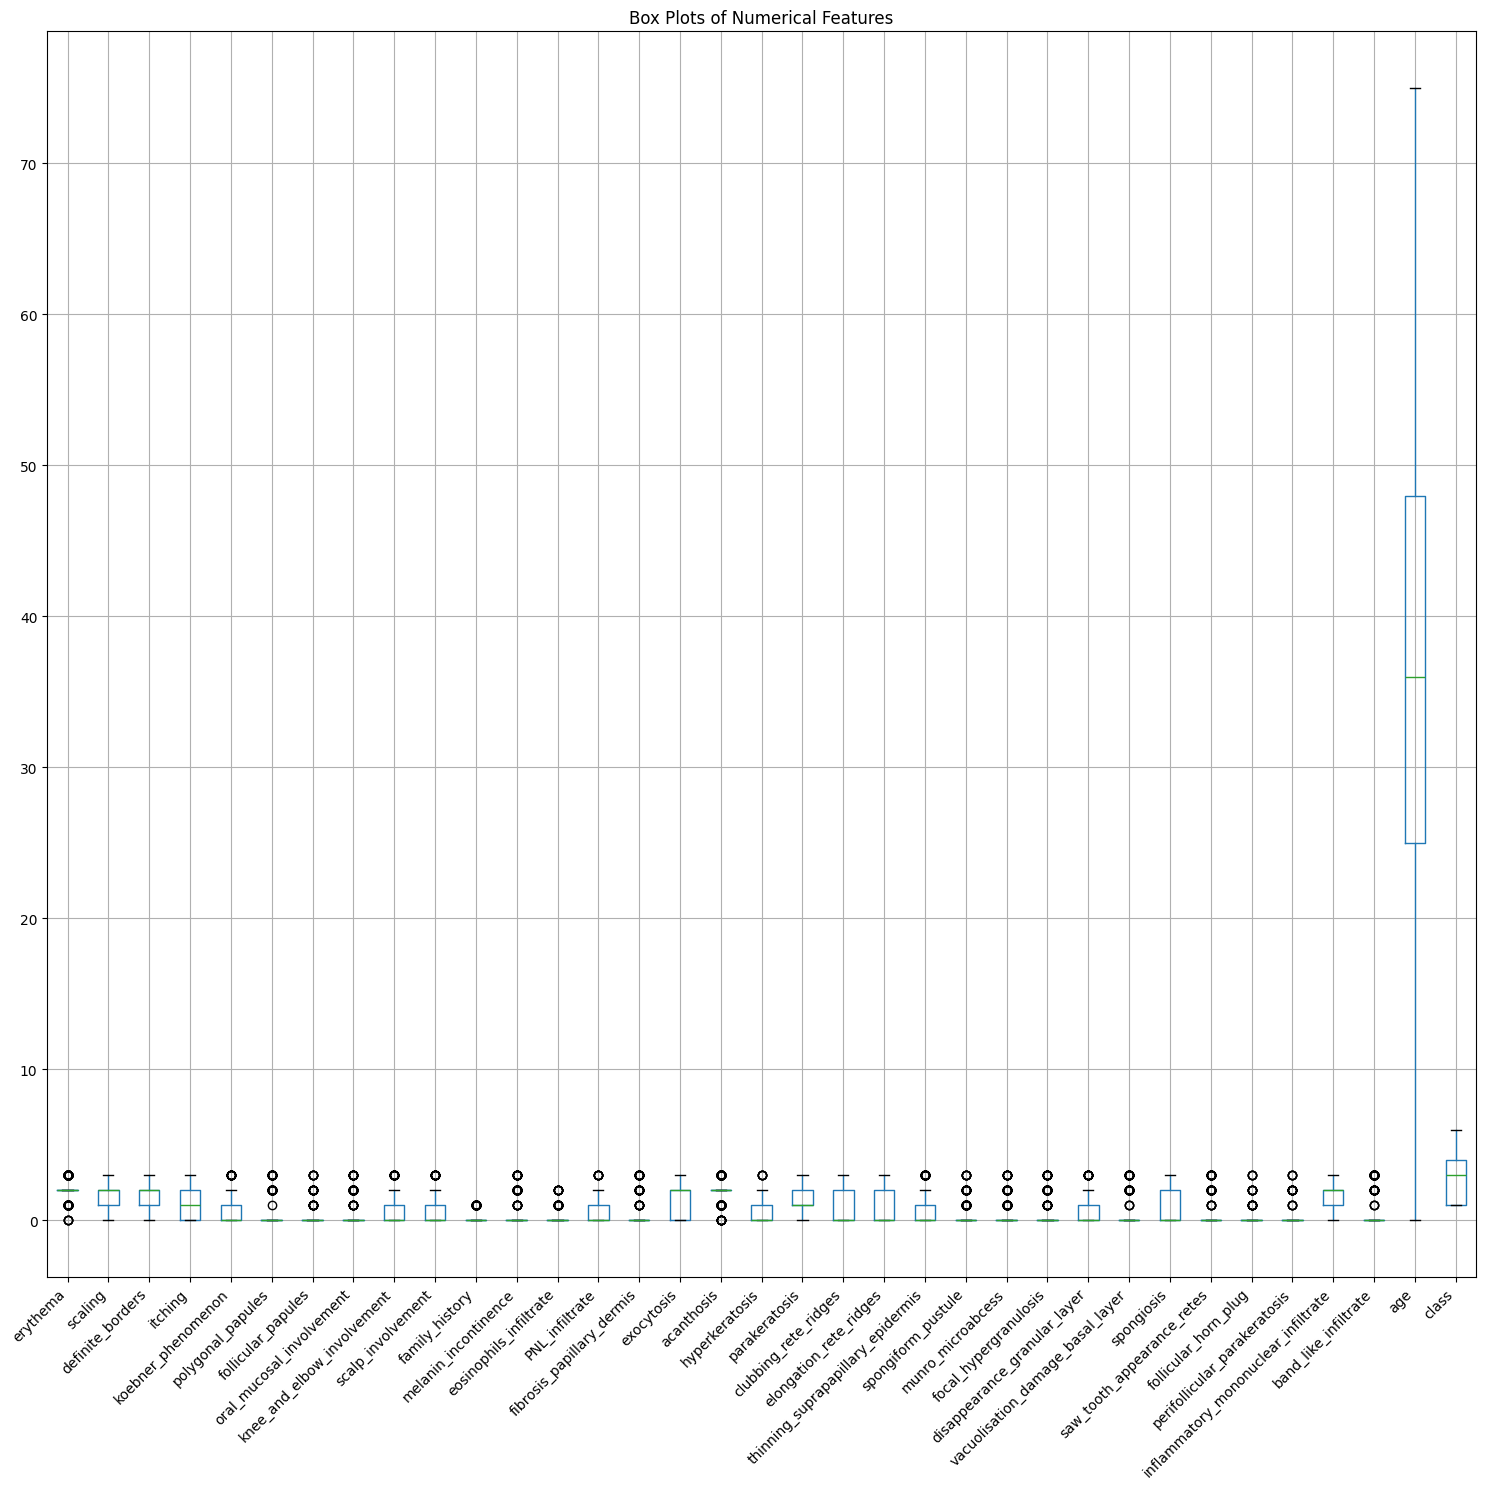

In [ ]:
import matplotlib.pyplot as plt
data.boxplot(figsize=(15, 15))
plt.xticks(rotation=45, ha='right')
plt.title("Box Plots of Numerical Features")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()